# loading libraries


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import scipy.optimize as opt
%matplotlib inline


In [126]:
# The code was removed by Watson Studio for sharing.

# Reading the data from customer loan dataset

In [127]:
#my_data = pd.read_csv("loan.csv", delimiter=",")
my_data['due_date'] = pd.to_datetime(my_data['due_date'])
my_data['effective_date'] = pd.to_datetime(my_data['effective_date'])
my_data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,female


# Data Visualization and Analysis 

In [128]:
my_data['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad1dfc8be0>]], dtype=object)

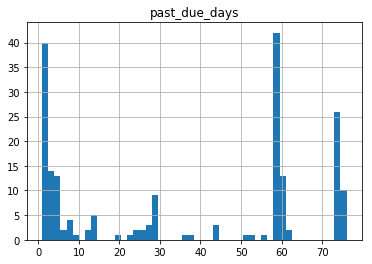

In [129]:
my_data.hist(column='past_due_days', bins=50)

# Building Model for KNN

# Feature set

In [130]:
my_data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

# Preprocessing 

In [131]:
my_data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
my_data.head()
Feature = my_data[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(my_data['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,50,1,1,0,0
2,1000,30,33,1,1,0,0
3,1000,15,27,0,0,0,1
4,1000,30,28,1,0,0,1


In [132]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,50,1,1,0,0
2,1000,30,33,1,1,0,0
3,1000,15,27,0,0,0,1
4,1000,30,28,1,0,0,1


In [133]:
y = my_data['loan_status']
y.head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

# Normalize  data

In [134]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.49337687,  0.89789115,  2.28404253, -0.42665337, -0.39336295,
         1.17997648, -0.88640526],
       [ 0.49337687,  0.89789115,  3.10658738,  2.34382305,  2.54218146,
        -0.84747452, -0.88640526],
       [ 0.49337687,  0.89789115,  0.3099349 ,  2.34382305,  2.54218146,
        -0.84747452, -0.88640526],
       [ 0.49337687, -0.97897162, -0.67711892, -0.42665337, -0.39336295,
        -0.84747452,  1.12815215],
       [ 0.49337687,  0.89789115, -0.51260995,  2.34382305, -0.39336295,
        -0.84747452,  1.12815215]])

# Train Test Split 

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 7) (400,)
Test set: (100, 7) (100,)


# Classification

### K nearest neighbor(KNN)

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Training

#### when k=4

In [137]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

# Predicting

In [138]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['COLLECTION_PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

# Accuracy Evaluation

In [139]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5825
Test set Accuracy:  0.55


In [140]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [141]:
print("Jaccard score: ", jaccard_similarity_score(y_test,yhat))
print("Logloss score: ", log_loss(y_test,neigh.predict_proba(X_test)))
print("F1 score: ", f1_score(y_test,yhat,average=None))

Jaccard score:  0.55
Logloss score:  2.24290076805
F1 score:  [ 0.1875      0.07407407  0.72340426]


### with other k values

In [142]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.38,  0.33,  0.49,  0.5 ,  0.5 ,  0.54,  0.55,  0.56,  0.62])

## Plotting for different values of k

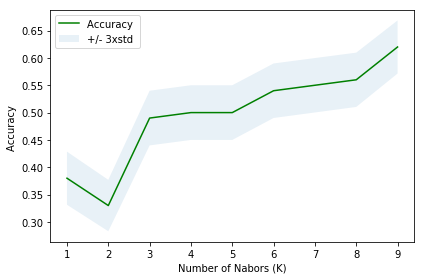

In [143]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [144]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.62 with k= 9


# Building the model for Decision Tree

## Setting up the Decision Tree

#### We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling

In [147]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [148]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction

In [149]:
predTree = LoanTree.predict(X_testset)

In [150]:
print (predTree [0:5])
print (y_testset [0:5])


['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
130    PAIDOFF
291    PAIDOFF
37     PAIDOFF
239    PAIDOFF
191    PAIDOFF
Name: loan_status, dtype: object


# Evaluation

In [151]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.626666666667


In [152]:
print("Jaccard score: ", jaccard_similarity_score(y_testset, predTree))
print("Logloss score: ", log_loss(y_test,LoanTree.predict_proba(X_test)))

print("F1 score: ", f1_score(y_testset, predTree,average='weighted'))

Jaccard score:  0.626666666667
Logloss score:  1.16033118632
F1 score:  0.487978142077


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Building the model using SVM

## Train/Test Data

In [153]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 7) (400,)
Test set: (100, 7) (100,)


## Modeling (SVM with Scikit-learn)

In [154]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [155]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [156]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))

SVM's Accuracy:  0.66


## Evaluation

#### f1_score

In [157]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.52481927710843368

In [158]:

print("F1 score: ", f1_score(y_test,yhat,average='weighted'))


F1 score:  0.524819277108


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### jaccard index for accuracy

In [159]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.66000000000000003

# Building Model using Logistic Regression

### Train/Test Data

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 7) (400,)
Test set: (100, 7) (100,)


### Modeling (Logistic Regression with Scikit-learn)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
yhat = LR.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

In [163]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[ 0.28071445,  0.3055821 ,  0.41370345],
       [ 0.1997919 ,  0.24137317,  0.55883494],
       [ 0.27966075,  0.28286963,  0.43746962],
       [ 0.27677106,  0.30916513,  0.41406382],
       [ 0.25601242,  0.27092982,  0.47305776],
       [ 0.30220187,  0.27837809,  0.41942005],
       [ 0.32419427,  0.28503097,  0.39077476],
       [ 0.32626007,  0.28324186,  0.39049807],
       [ 0.2899504 ,  0.30002716,  0.41002243],
       [ 0.30220187,  0.27837809,  0.41942005],
       [ 0.28928546,  0.30062409,  0.41009046],
       [ 0.28399268,  0.30539201,  0.41061531],
       [ 0.24303188,  0.26388511,  0.49308302],
       [ 0.2899504 ,  0.30002716,  0.41002243],
       [ 0.29328412,  0.27634451,  0.43037137],
       [ 0.2774622 ,  0.26743325,  0.45510456],
       [ 0.32763994,  0.282049  ,  0.39031107],
       [ 0.28606976,  0.28283176,  0.43109848],
       [ 0.31462059,  0.29337295,  0.39200646],
       [ 0.30286573,  0.27778942,  0.41934485],
       [ 0.30419525,  0.27661203,  0.419

## Evaluation

In [164]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.66000000000000003

In [165]:

print("F1 score: ", f1_score(y_test,yhat,average='weighted'))


F1 score:  0.524819277108


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### log loss

In [166]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.98330665952307073